In [1]:
import os
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

#from scipy.stats import spearmanr

In [2]:
data = pd.read_csv('../merge/data_with_features.txt', sep='\t')
data = data[((data['tumor_fraction']>=0.1) & (data['ulp_wgs_coverage']>=0.1))]
data = data[~(data['merged_updated_ER_status_binary']=='none')]
out_dir = 'feat_vs_tfx'

In [3]:
print(len(data['sample'].unique())) #191 ULP 


191


In [4]:
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [5]:
data.head()

,sample,patient_id,merged_updated_ER_status_binary,ulp_wgs_coverage,tumor_fraction,first_passing_sample,site_name,endpoint,GC_correction,central_cov,...,840,855,870,885,900,915,930,945,960,975
0,MBC_1115_4_ULP,MBC_1115,+,0.148148,0.2652,NaN,ER_neg_0_5_FC,midpoint,GC_corrected,1.085445,...,1.01718,1.03792,1.04386,1.00549,0.99454,0.95871,0.97875,0.95625,0.98428,0.97529
1,MBC_1115_4_ULP,MBC_1115,+,0.148148,0.2652,NaN,ER_neg_heme_0_5_FC,midpoint,GC_corrected,0.938898,...,0.99704,1.02448,1.00723,1.02087,1.02739,1.03985,1.03491,1.02704,0.99873,1.00661
2,MBC_1115_4_ULP,MBC_1115,+,0.148148,0.2652,NaN,ER_pos_0_5_FC,midpoint,GC_corrected,0.997915,...,1.00267,0.99210,0.98979,1.01632,1.05052,1.03731,1.03360,1.00647,0.96497,0.99699
3,MBC_1115_4_ULP,MBC_1115,+,0.148148,0.2652,NaN,ER_pos_heme_0_5_FC,midpoint,GC_corrected,0.927473,...,0.96026,0.97085,0.96098,0.97649,0.98300,0.99590,0.98239,0.96983,0.95970,0.93720
4,MBC_1421_2_ULP,MBC_1421,-,0.181337,0.1822,1.0,ER_neg_0_5_FC,midpoint,GC_corrected,0.910297,...,1.03781,1.06413,1.05378,1.03734,1.01661,1.00003,0.95069,0.91083,0.90483,0.91148


In [6]:
color_dict = {'+':'tab:blue', '-':'tab:orange','pos_deep':'tab:green','neg_deep':'tab:red','HD_deep':'black'}

In [7]:
def fill_plot(ax,feature):   
    #add correlation text to ax
    for subtype in ['+','-']:
        current = data[(data['merged_updated_ER_status_binary']==subtype) &(data['site_name']==site_name) & (data['GC_correction']=='GC_corrected')]
        x = current['tumor_fraction']
        y = current[feature]
        ax.scatter(x,y,  alpha = 0.3, color = color_dict[subtype])
        print(subtype,len(current))
        
        lin_reg_slope, lin_reg_intercept, pearson_r, pearson_p, lin_reg_std_err = linregress(x,y)
        fit_line = lin_reg_slope*x+lin_reg_intercept
        formatted_p = '{:0.2e}'.format(pearson_p)
        formatted_rho = str(np.round(pearson_r,2))
        ax.plot(x,fit_line,color=color_dict[subtype], label = 'ER'+subtype+' r='+formatted_rho+' p='+formatted_p)

        ax.legend(framealpha = 0.4)
        del(current,subtype)

    ######################

ER_pos_0_5_FC 0.23132991790771484
+ 99
- 92
+ 99
- 92
+ 99
- 92
ER_pos_heme_0_5_FC 0.3016390800476074
+ 99
- 92
+ 99
- 92
+ 99
- 92
ER_neg_0_5_FC 0.36639404296875
+ 99
- 92
+ 99
- 92
+ 99
- 92
ER_neg_heme_0_5_FC 0.4432179927825928
+ 99
- 92
+ 99
- 92
+ 99
- 92
done


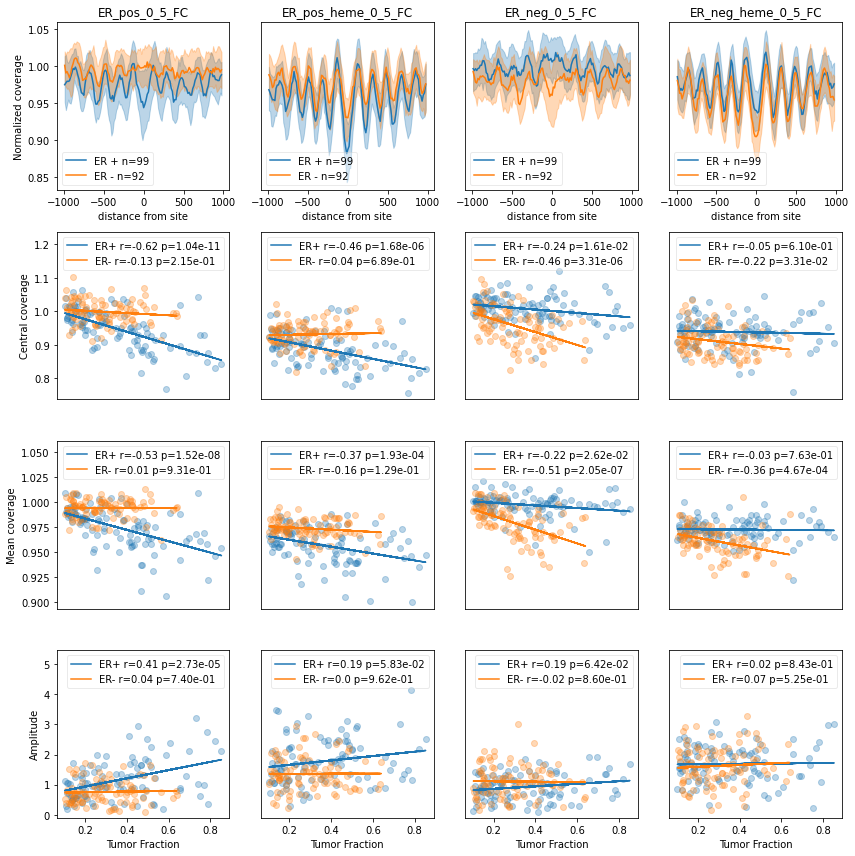

In [8]:
start_time = time.time()

fig,axes = plt.subplots(4,4,figsize=(12,12), sharey = 'row')

for i,site_name in enumerate(['ER_pos_0_5_FC','ER_pos_heme_0_5_FC','ER_neg_0_5_FC','ER_neg_heme_0_5_FC']):    
    print(site_name, time.time()-start_time)
    
    ######################
    #plot the tumor fraction correlation 
    fill_plot(axes[1,i],'central_cov')
    axes[1,0].set_ylabel('Central coverage')
    
    fill_plot(axes[2,i],'mean_cov')
    axes[2,0].set_ylabel('Mean coverage')

    fill_plot(axes[3,i],'fft_10_magnitude')
    axes[3,0].set_ylabel('Amplitude')
    
    ######################
    #plot coverage in top row
    ax = axes[0,i]
    for subtype in ['+','-']:
        current = data[(data['merged_updated_ER_status_binary']==subtype) & (data['site_name']==site_name) & (data['GC_correction']=='GC_corrected')]
        ax.plot(plot_columns, current[str_plot_columns].median(), color = color_dict[subtype], label = 'ER '+subtype+' n='+str(len(current)))
        ax.fill_between(plot_columns, np.percentile(current[str_plot_columns],25, axis = 0), np.percentile(current[str_plot_columns],75, axis = 0), color = color_dict[subtype], alpha=0.3)
    ax.set_title(site_name)
    #remove ticks on the left
    ax.tick_params(left = False)
    ax.set_xlabel('distance from site')
    ax.legend(loc='lower left', framealpha = 0.4)
    ######################

    #remove tick labels on the left of every box and the bottom of every box
    axes[1,i].tick_params(bottom = False, labelbottom = False, left = False, labelleft=False)
    axes[2,i].tick_params(bottom = False, labelbottom = False, left = False, labelleft=False)
    
    #for the last row only remove the left and add the tumor fraction label
    axes[3,i].tick_params(left = False, labelleft=False)
    axes[3,i].set_xlabel('Tumor Fraction')
    
#label the y axis in the first column
axes[0,0].tick_params(left = True, labelleft=True)
axes[1,0].tick_params(left = True, labelleft=True)
axes[2,0].tick_params(left = True, labelleft=True)
axes[3,0].tick_params(left = True, labelleft=True)

axes[0,0].set_ylabel('Normalized coverage')

#add enough space for the legends
for i in [1,2,3]:
    a,b = axes[i,0].get_ylim()
    axes[i,0].set_ylim(a,b+(b-a)*.25)


fig.tight_layout()
fig.savefig(out_dir+'/features_vs_tfx.pdf')
print('done')